In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("train.csv")

In [3]:
print("The shape of data is :" ,data.shape)

The shape of data is : (891, 12)


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

EXPLORATORY DATA ANALYSIS

In [6]:
data.describe()  #checking summary of data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


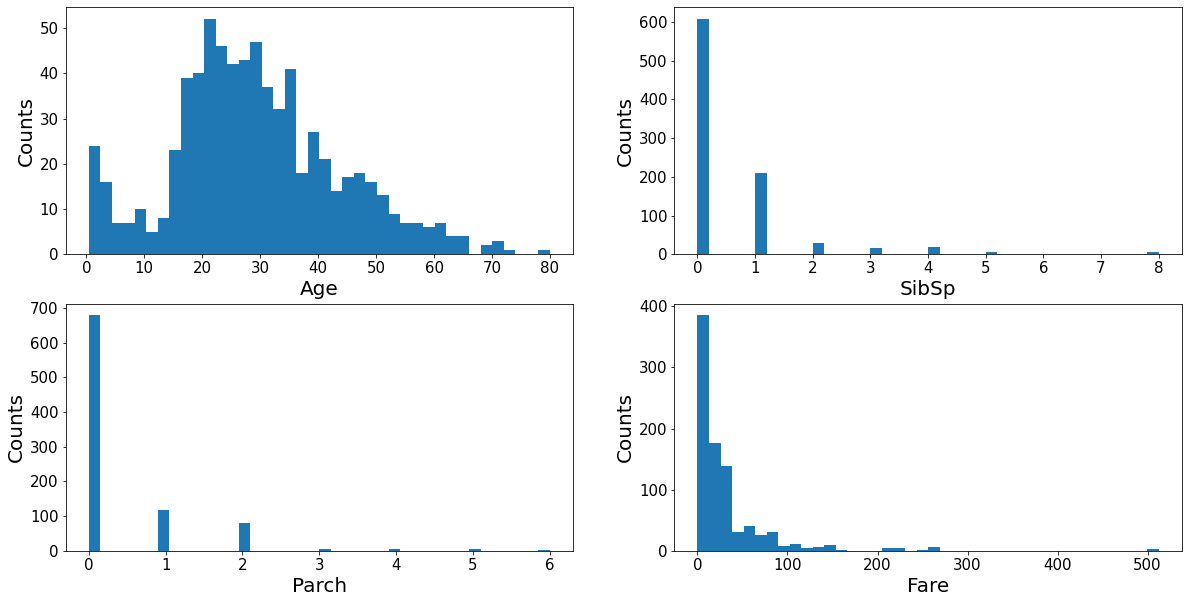

In [7]:
import matplotlib.pyplot as plt
#%matplotlib InvalidIndexError
plt.rcParams['figure.figsize'] = (20,10)

#making subplots
fig,axes  = plt.subplots(nrows=2,ncols=2)
#specifying number of features
num_features = ['Age','SibSp','Parch','Fare']
xares = num_features
yaxes = ['Counts','Counts','Counts','Counts']

#drawing histogram
axes = axes.ravel()
for idx , ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(),bins =40)
    ax.set_xlabel(xares[idx], fontsize = 20)
    ax.set_ylabel(yaxes[idx], fontsize = 20)
    ax.tick_params(axis = 'both', labelsize = 15)


BARPLOT OF CATEGORICAL DATA

0     no
1    yes
Name: Survived, dtype: object
0    549
1    342
Name: Counts, dtype: int64
0    female
1      male
Name: Sex, dtype: object
0    314
1    577
Name: Counts, dtype: int64


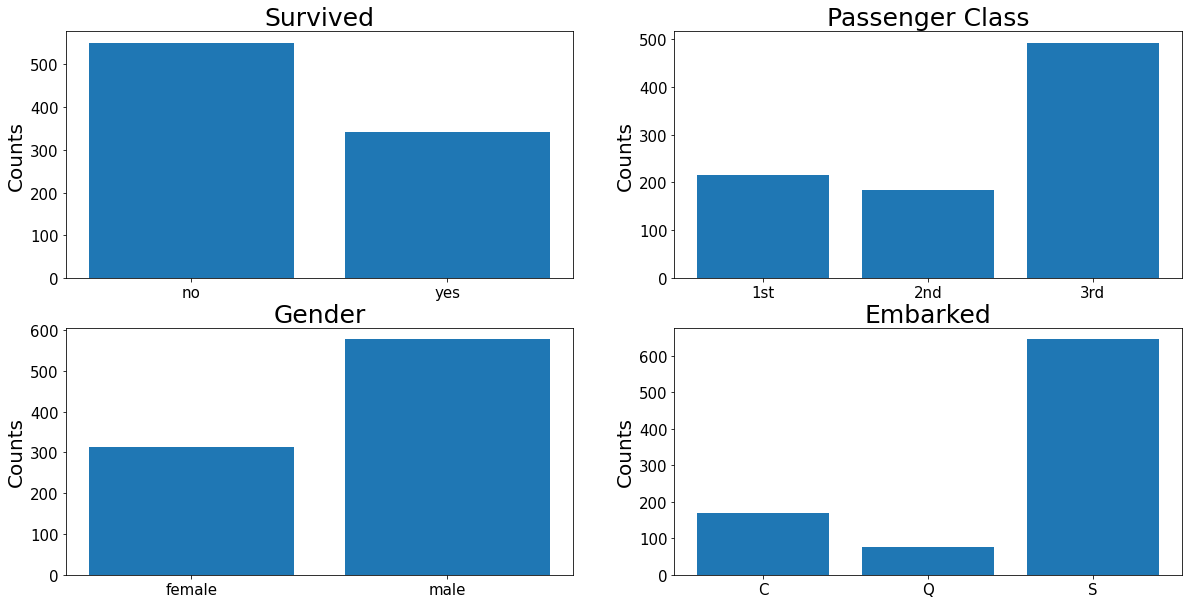

In [8]:
plt.rcParams['figure.figsize'] = (20,10)

#making subplots
fig,axes = plt.subplots(nrows = 2 , ncols = 2)
  
#making data ready to feedinto the visulizer

X_survived = data.replace({'Survived' : {1: 'yes', 0 : 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Survived']
Y_survived = data.replace({'Survived' : {1: 'yes', 0 : 'no'}}).groupby('Survived').size().reset_index(name ='Counts')['Counts']


print(X_survived)
print(Y_survived)


#make the bar plot
axes[0,0].bar(X_survived,Y_survived)
axes[0,0].set_title('Survived',fontsize = 25)
axes[0,0].set_ylabel('Counts',fontsize = 20)
axes[0,0].tick_params(axis='both',labelsize = 15)

# classes of passengers
X_Pclass = data.replace({'Pclass' :{1 : '1st', 2 : "2nd", 3: '3rd'}}).groupby('Pclass').size().reset_index(name = 'Counts')["Pclass"]
Y_Pclass = data.replace({"Pclass" :{1 :"1st",2:"2nd",3:"3rd"}}).groupby("Pclass").size().reset_index(name = "Counts")['Counts']

#making bar plot

axes[0,1].bar(X_Pclass,Y_Pclass)
axes[0,1].set_title('Passenger Class',fontsize = 25)
axes[0,1].set_ylabel('Counts',fontsize = 20)
axes[0,1].tick_params(axis='both',labelsize = 15)


#Gender of passsengers

X_sex = data.groupby("Sex").size().reset_index(name = "Counts")['Sex']
Y_sex = data.groupby("Sex").size().reset_index(name= 'Counts')['Counts']

print(X_sex)
print(Y_sex)

#making the bar plot
axes[1,0].bar(X_sex,Y_sex)
axes[1,0].set_title('Gender', fontsize = 25)
axes[1,0].set_ylabel('Counts', fontsize = 20)
axes[1,0].tick_params(axis = 'both', labelsize = 15)

# Embarked

X_embarked = data.groupby('Embarked').size().reset_index(name = "Counts")["Embarked"]
Y_embarked = data.groupby('Embarked').size().reset_index(name = "Counts")["Counts"]

#making barplot
axes[1,1].bar(X_embarked,Y_embarked)
axes[1,1].set_title("Embarked" , fontsize = 25)
axes[1,1].set_ylabel('Counts', fontsize = 20)
axes[1,1].tick_params(axis = 'both', labelsize = 15)


Are the numerical values corelated

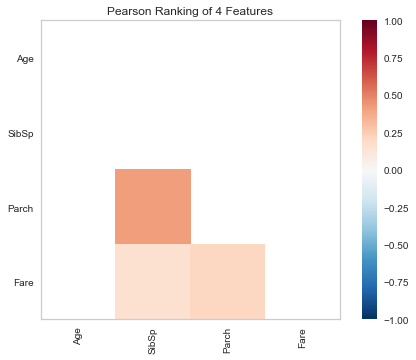

<AxesSubplot:title={'center':'Pearson Ranking of 4 Features'}>

In [9]:
plt.rcParams['figure.figsize'] = (15,7)

#importing package for visulization

from yellowbrick.features import Rank2D
#extracting numpy array from data frame
X = data[num_features].values

#instances the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features = num_features, algorithm = 'pearson')
visualizer.fit(X) # fit the data to the visualizer
visualizer.transform(X)
visualizer.poof()


The Correlation between vaiables are low that < 0.50>

ARE THE DISTRIBUTION OF NUMERICAL VARIABLES THE SAME OR DIFFERENT AMONG SURVIVED AND NOT SURVIVED?

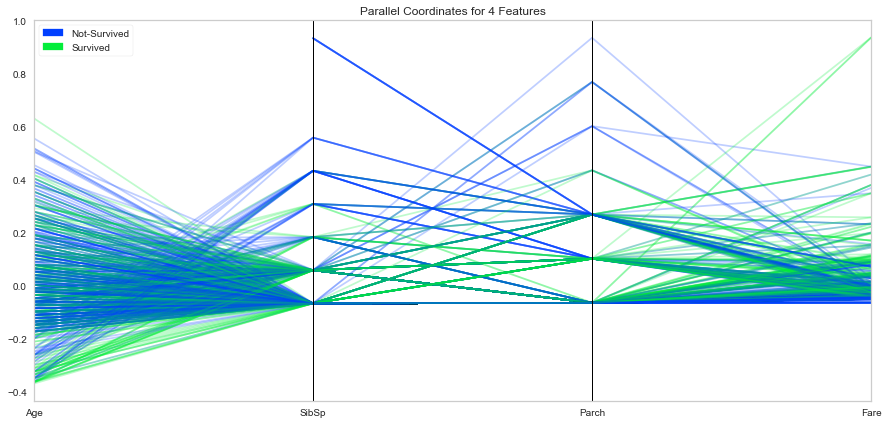

<AxesSubplot:title={'center':'Parallel Coordinates for 4 Features'}>

In [10]:
plt.rcParams['figure.figsize'] = (15,7)
plt.rcParams['font.size'] = 50

#setting up color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')   

#import Parelle Coordinates Package
from yellowbrick.features import ParallelCoordinates

#specifying features of interest and classes of targets

Class = ['Not-Survived','Survived']
num_features = ["Age","SibSp","Parch","Fare"]

#copying data to new data frame
data_norm = data.copy()

#normalizing data in 0-1 range
for feature in num_features:
    data_norm[feature] = (data[feature] - data[feature].mean(skipna = True)) / (data[feature].max(skipna = True) - data[feature].min(skipna = True))

#Extracting the numpy array from the data frame

X = data_norm[num_features].values
Y = data.Survived.values

#intitaing the visulizer
visualizer = ParallelCoordinates(classes = Class , features = num_features) 
visualizer.fit(X,Y)  # fitting the data
visualizer.transform(X)  #transforming the data
visualizer.poof() # draw the data

People with more siblling have higher data rate and people with higher fare i.e first class survived most.

ARE THERE DIFFERENT SURVIVAL RATES IN DIFFERENT CATEGORIES?

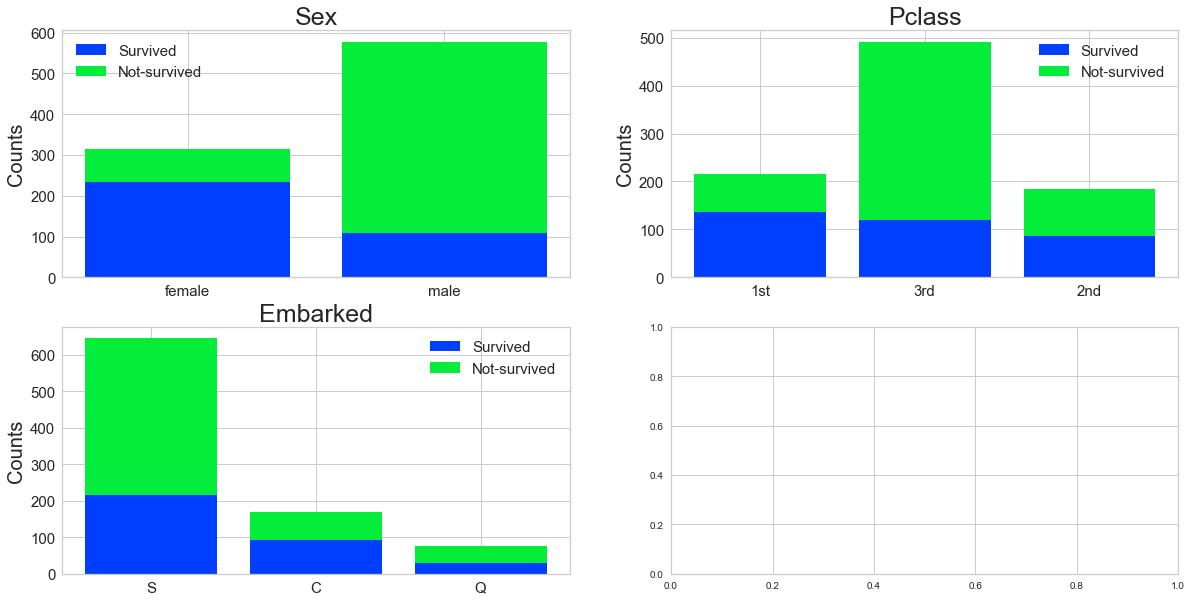

In [11]:
plt.rcParams['figure.figsize'] = (20,10)
#makeing subplots
fig , axes = plt.subplots(nrows = 2 , ncols = 2)

#making data redable to feed into the visulizer

# make the data read to feed into the visulizer
Sex_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==1]['Sex'].value_counts()
Sex_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==0]['Sex'].value_counts()
Sex_not_survived = Sex_not_survived.reindex(index = Sex_survived.index)
# make the bar plot
p1 = axes[0, 0].bar(Sex_survived.index, Sex_survived.values)
p2 = axes[0, 0].bar(Sex_not_survived.index, Sex_not_survived.values, bottom=Sex_survived.values)
axes[0, 0].set_title('Sex', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Survived', 'Not-survived'), fontsize = 15)


# make the data read to feed into the visulizer
Pclass_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[data['Survived']==1]['Pclass'].value_counts()
Pclass_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[data['Survived']==0]['Pclass'].value_counts()
Pclass_not_survived = Pclass_not_survived.reindex(index = Pclass_survived.index)
# make the bar plot
p3 = axes[0, 1].bar(Pclass_survived.index, Pclass_survived.values)
p4 = axes[0, 1].bar(Pclass_not_survived.index, Pclass_not_survived.values, bottom=Pclass_survived.values)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Survived', 'Not-survived'), fontsize = 15)

# make the data read to feed into the visulizer
Embarked_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==1]['Embarked'].value_counts()
Embarked_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==0]['Embarked'].value_counts()
Embarked_not_survived = Embarked_not_survived.reindex(index = Embarked_survived.index)
# make the bar plot
p5 = axes[1, 0].bar(Embarked_survived.index, Embarked_survived.values)
p6 = axes[1, 0].bar(Embarked_not_survived.index, Embarked_not_survived.values, bottom=Embarked_survived.values)
axes[1, 0].set_title('Embarked', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Survived', 'Not-survived'), fontsize = 15)

we can see from figures above, more females survived than men and the death rates in the 3rd ticket class and the embarkation from Southampton port are much higher than the others.

In [12]:
#filling missing values with median
def fill_na_median(data, inplace = True):
    return(data.fillna(data.median(), inplace = inplace))

fill_na_median(data['Age'])

#summary of Age coloumn
data["Age"].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [13]:
# filling Emabrked with most occuring value i.e is 'S'

def fill_most_occuring(data, inplace = True):
    return(data.fillna("S",inplace = inplace))

fill_most_occuring(data['Embarked'])

data['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

We can see that from fare visulization that fare is highly right skewed. In order to make our continious data i.e farer normal we are going to do log transformation of fare column

In [14]:
# log-transformation

def log_transformation(data):
    return(data.apply(np.log1p))

data["Fare_log1p"] =  log_transformation(data['Fare'])



data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_log1p
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,2.962246
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.969048
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,2.187218
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,2.737881
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,3.465736
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,6.240917


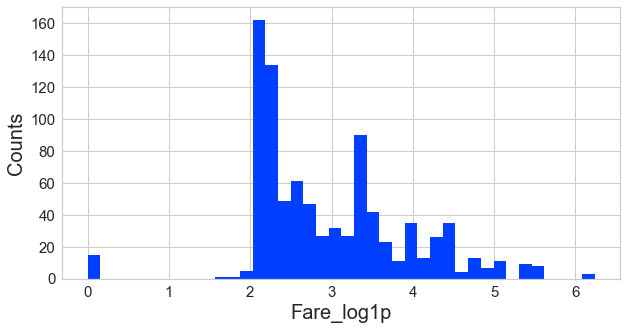

In [15]:
#checking the distribution using histogram

plt.rcParams['figure.figsize'] = (10,5)
plt.hist(data['Fare_log1p'],bins = 40)
plt.xlabel('Fare_log1p', fontsize = 20)
plt.ylabel('Counts', fontsize = 20)
plt.tick_params(axis = 'both', labelsize = 15)

Transforming Categorical variable into Numerical using One Hot Encoding

In [16]:
# gettingi categorical data
cat_feature = ["Pclass","Sex","Embarked"]
data_cat = data[cat_feature]

data_cat = data_cat.replace({'Pclass':{1:'1st', 2 : "2nd",3 : "3rd"}})

#one hot encoding

data_cat_dummies = pd.get_dummies(data_cat)

data_cat_dummies.head()

,Pclass_1st,Pclass_2nd,Pclass_3rd,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1


MODEL TRAINING AND MODEL EVALUATION

In [19]:
#PREPARING DATA FOR EVALUATION
# creating a whole features dataset that can be used for train and validation data splitting
# here I will combine the numerical features and the dummie features together

features_model = ['Age','SibSp','Parch','Fare_log1p']
data_model_X = pd.concat([data[features_model], data_cat_dummies], axis = 1)

#creating a whole target dataset that can be used for train and validation data splitting

data_model_Y = data.replace({'Survived': {1:'Survived',0:'Not-Survived'}})['Survived']   #target set



In [21]:
print(data_model_X)


      Age  SibSp  Parch  Fare_log1p  Pclass_1st  Pclass_2nd  Pclass_3rd  \
0    22.0      1      0    2.110213           0           0           1   
1    38.0      1      0    4.280593           1           0           0   
2    26.0      0      0    2.188856           0           0           1   
3    35.0      1      0    3.990834           1           0           0   
4    35.0      0      0    2.202765           0           0           1   
..    ...    ...    ...         ...         ...         ...         ...   
886  27.0      0      0    2.639057           0           1           0   
887  19.0      0      0    3.433987           1           0           0   
888  28.0      1      2    3.196630           0           0           1   
889  26.0      0      0    3.433987           1           0           0   
890  32.0      0      0    2.169054           0           0           1   

     Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0             0         1          

In [22]:
print(data_model_Y)

0      Not-Survived
1          Survived
2          Survived
3          Survived
4      Not-Survived
           ...     
886    Not-Survived
887        Survived
888    Not-Survived
889        Survived
890    Not-Survived
Name: Survived, Length: 891, dtype: object


In [23]:
#seprating data into training and validation sets

#importing sklearn package

from sklearn.model_selection import train_test_split

#spliting data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_Y, test_size = 0.3 , random_state = 11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Survived and not-survived
print('\n')
print('No. of survived and not-survived in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of survived and not-survived in the validation set:')
print(y_val.value_counts())

No. of samples in training set:  623
No. of samples in validation set: 268


No. of survived and not-survived in the training set:
Not-Survived    373
Survived        250
Name: Survived, dtype: int64


No. of survived and not-survived in the validation set:
Not-Survived    176
Survived         92
Name: Survived, dtype: int64
